In [ ]:
#The testing image naturally has a grey linein the middle



from PIL import Image, ImageOps
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import time
import os
import random


mod_path = Path("/Volumes/Sans/ROI") #Path(__file__).parent. This is specific to my computer. You can get this same result by running a python program in the same directory, and saying: print(Path(__file__).parent)



secondDict = 0 #Whether the program is writing to the second dictionary or not

input_dirImage = os.listdir((mod_path / "Images").resolve())
imput_dirGround = os.listdir((mod_path / "groundTruth").resolve())
len_images = len(input_dirImage)
size = (32,32) #Size of the ROI
fitSize = (900,800) #Size to change the original Image to before ROI
start_time = time.time() #starting the timer

dictionary = dict()
dictionary['image'] = []#Array that holds the ROI grayscale values
dictionary['ground'] = []#Array that holds the ROI groundtruth true or false values

dictionary2 = dict()
dictionary2['image'] = []#Array that holds the ROI grayscale values
dictionary2['ground'] = []#Array that holds the ROI groundtruth true or false values

dictionary3 = dict()
dictionary3['image'] = []#Array that holds the ROI grayscale values
dictionary3['ground'] = []#Array that holds the ROI groundtruth true or false values

dictionary3 = dict()
dictionary3['image'] = []#Array that holds the ROI grayscale values
dictionary3['ground'] = []#Array that holds the ROI groundtruth true or false values

dictionary4 = dict()
dictionary4['image'] = []#Array that holds the ROI grayscale values
dictionary4['ground'] = []#Array that holds the ROI groundtruth true or false values

dictionary5 = dict()
dictionary5['image'] = []#Array that holds the ROI grayscale values
dictionary5['ground'] = []#Array that holds the ROI groundtruth true or false values

dictionaryTest = dict()
dictionaryTest['image'] = []#Array that holds the ROI grayscale values
dictionaryTest['ground'] = []#Array that holds the ROI groundtruth true or false values

for image in input_dirImage[0:len_images]:

    if image == '.DS_Store':
        continue

    # parent_path = Path(__file__).parent

    secondDirImage = (mod_path / "Images" / image).resolve() #Path of the covid image
    secondDirGround = groundTruthDir = (mod_path / "groundTruth" / "fourPositive_b&w.tif").resolve() #Path of the ground truth

    image = Image.open(str(secondDirImage))
    ground = Image.open(str(secondDirGround))

    image = ImageOps.fit(image, fitSize, Image.ANTIALIAS)
    ground = ImageOps.fit(ground, fitSize, Image.ANTIALIAS)


    xBias = 0
    yBias = 0

    while(yBias + size[1] <= fitSize[1]):
        crop_rectangle = (xBias, yBias, xBias + size[0], yBias + size[1])


        
        tempGround  = np.mean(np.array(ground.crop(crop_rectangle)),axis = 2)

        # plt.imshow(np.array(image.crop(crop_rectangle).convert("L"), dtype = np.uint8), cmap = "gray")
        # plt.show()
        # plt.imshow(np.mean(np.array(image.crop(crop_rectangle)),axis = 2), cmap = "gray")
        # plt.show()
        
        count = 0
        # print(tempGround.size)
        # print(np.array(ground.crop(crop_rectangle)).shape)
        # print(np.mean(np.array(ground.crop(crop_rectangle)),axis = 2).shape)
        # for i in range(0,tempGround.shape[0]):
        #     for j in range(0,tempGround.shape[1]):
        #         if tempGround[i][j] > 50:
        #             count+=1
        # print(count)
        tempGround[tempGround<50.0] = False
        tempGround[tempGround>240.0] = True  #All values greater than 240 become true. Are in this order because otherwise
        
        # print(tempGround.shape)

        # print(np.count_nonzero(tempGround))
        if secondDict == 0:
            dictionary['image'].append(np.mean(np.array(image.crop(crop_rectangle)),axis = 2))

            dictionary['ground'].append(1 if tempGround[tempGround.shape[0]//2][tempGround.shape[1]//2] == True else 0)

            if len(dictionary['image']) > (fitSize[1]-size[1]) * (fitSize[0] - size[0])/6:
                secondDict = 1
                print("yoop")
        elif secondDict == 1:
            dictionary2['image'].append(np.mean(np.array(image.crop(crop_rectangle)),axis = 2))

            dictionary2['ground'].append(1 if tempGround[tempGround.shape[0]//2][tempGround.shape[1]//2] == True else 0)

            if len(dictionary2['image']) > (fitSize[1]-size[1]) * (fitSize[0] - size[0])/6:
                secondDict = 2
                print("yoop")
        elif secondDict == 2:
            dictionary3['image'].append(np.mean(np.array(image.crop(crop_rectangle)),axis = 2))

            dictionary3['ground'].append(1 if tempGround[tempGround.shape[0]//2][tempGround.shape[1]//2] == True else 0)

            if len(dictionary3['image']) > (fitSize[1]-size[1]) * (fitSize[0] - size[0])/6:
                secondDict = 3
                print("yoop")
        elif secondDict == 3:
            dictionary4['image'].append(np.mean(np.array(image.crop(crop_rectangle)),axis = 2))

            dictionary4['ground'].append(1 if tempGround[tempGround.shape[0]//2][tempGround.shape[1]//2] == True else 0)

            if len(dictionary4['image']) > (fitSize[1]-size[1]) * (fitSize[0] - size[0])/6:
                secondDict = 4
                print("yoop")
        elif secondDict == 4:
            dictionary5['image'].append(np.mean(np.array(image.crop(crop_rectangle)),axis = 2))

            dictionary5['ground'].append(1 if tempGround[tempGround.shape[0]//2][tempGround.shape[1]//2] == True else 0)

            if len(dictionary5['image']) > (fitSize[1]-size[1]) * (fitSize[0] - size[0])/6:
                secondDict = 6
                print("yoop")
        else:
            dictionaryTest['image'].append(np.mean(np.array(image.crop(crop_rectangle)),axis = 2))

            dictionaryTest['ground'].append(1 if tempGround[tempGround.shape[0]//2][tempGround.shape[1]//2] == True else 0)


        # plt.imshow(np.mean(image.crop(crop_rectangle),axis = 2),cmap = "gray", vmin = 0, vmax = 255)
        # plt.show(block = False)
        # plt.pause(.2)
        # plt.close()
        # plt.imshow(np.mean(ground.crop(crop_rectangle),axis = 2),cmap = "gray", vmin = 0, vmax = 255)
        # plt.show(block = False)
        # plt.pause(.2)
        # plt.close()


        if(xBias + size[0] == fitSize[0]): #Only need to check the image's status, as the image and the ground have the same dimensions
            yBias += 1
            xBias = 0
            # print("dang")
        else:
            xBias +=1

totalDictionary = [dictionary,dictionary2,dictionary3,dictionary4,dictionary5]

combinedDictionary = dict()
combinedDictionary['image'] = []
combinedDictionary['ground'] = []

for dicts in totalDictionary:
    for i in range(0,len(dicts["image"]),500):
        combinedDictionary['image'].append(dicts["image"][i])
        combinedDictionary['ground'].append(dicts["ground"][i])
    
revisedTestDictionary = dict()
revisedTestDictionary['image'] = []
revisedTestDictionary['ground'] = []

for i in range(0,len(dictionaryTest),1000):
    revisedTestDictionary['image'].append(dictionaryTest["image"][i])
    revisedTestDictionary['ground'].append(dictionaryTest["ground"][i])



print("yo")
# print(np.count_nonzero(dictionary['ground']))
# print(len(dictionary['ground']))

# temp = list(zip(dictionary['image'], dictionary['ground'])) 
# random.shuffle(temp) 
# dictionary['image'], dictionary['ground'] = zip(*temp) 

# temp = list(zip(dictionary2['image'], dictionary2['ground'])) 
# random.shuffle(temp) 
# dictionary2['image'], dictionary2['ground'] = zip(*temp) 


import os
os.system('say "Done Done Done Done Done Done Done Done Done Done Done Done Done Done "')

# print("goddamn")
# with open((mod_path / 'image.pickle').resolve(),'wb') as handle:
# 		pickle.dump(dictionary, handle, protocol = pickle.HIGHEST_PROTOCOL)
# print("hell yeah")
# with open((mod_path / 'ground.pickle').resolve(),'wb') as handle:
# 		pickle.dump(dictionary2, handle, protocol = pickle.HIGHEST_PROTOCOL)
    



print("Process finished --- %s seconds ---" % (time.time() - start_time))

os.system('say "Done Done Done Done Done Done Done Done Done Done Done Done Done Done "')


In [18]:
print(len(dictionary['ground']))
print(len(dictionaryTest['ground']))
print(len(dictionary2['ground']))
print(len(dictionary3['ground']))
print(len(dictionary4['ground']))
print(len(dictionary5['ground']))


111105
112736
111105
111105
111105
111105


In [ ]:
mod_path = (mod_path / "Data").resolve()

with open((mod_path / 'one.pickle').resolve(),'wb') as handle:
    pickle.dump(combinedDictionary, handle, protocol = pickle.HIGHEST_PROTOCOL) #Saving train image arrays and labels in a dict
# with open((mod_path / 'two.pickle').resolve(),'wb') as handle:
#     pickle.dump(dictionary2, handle, protocol = pickle.HIGHEST_PROTOCOL) #Saving train image arrays and labels in a dict
# with open((mod_path / 'three.pickle').resolve(),'wb') as handle:
#     pickle.dump(dictionary3, handle, protocol = pickle.HIGHEST_PROTOCOL) #Saving train image arrays and labels in a dict
# with open((mod_path / 'four.pickle').resolve(),'wb') as handle:
#     pickle.dump(dictionary4, handle, protocol = pickle.HIGHEST_PROTOCOL) #Saving train image arrays and labels in a dict
# with open((mod_path / 'five.pickle').resolve(),'wb') as handle:
#     pickle.dump(dictionary5, handle, protocol = pickle.HIGHEST_PROTOCOL) #Saving train image arrays and labels in a dict
with open((mod_path / 'test.pickle').resolve(),'wb') as handle: #This exports the plotting data
    pickle.dump(revisedTestDictionary, handle, protocol = pickle.HIGHEST_PROTOCOL) #Saving train image arrays and labels in a dict



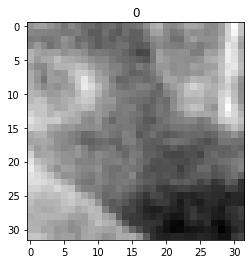

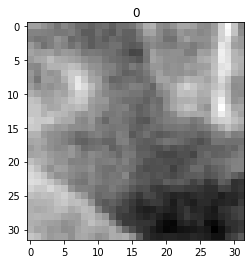

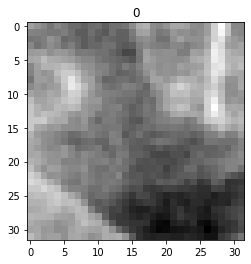

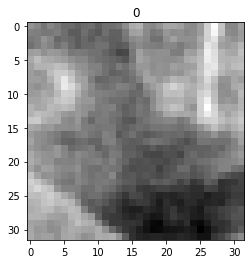

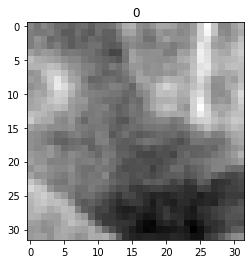

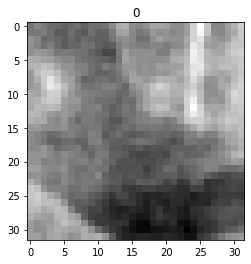

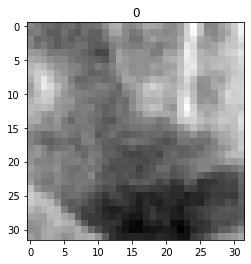

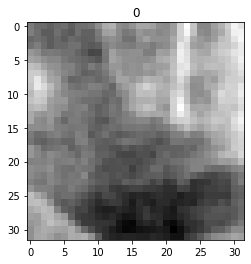

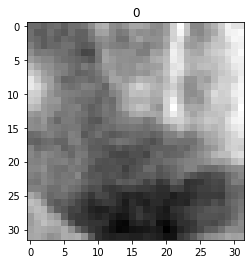

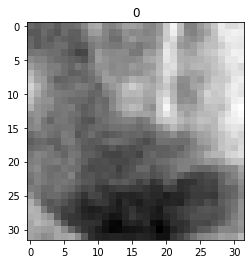

In [21]:
import matplotlib.pyplot as plt
for i in range(450,460):
    plt.imshow(dictionary["image"][i], cmap = "gray")
    plt.title(dictionary["ground"][i])
    plt.show()